# 여러 좌표 한번에 나타내기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os.path as osp
import os
import requests
import numpy as np
import pandas as pd
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

#renet50 model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

136.0 48.0
112.0 64.0
104.0 64.0
96.0 104.0
112.0 64.0
120.0 64.0
128.0 88.0
128.0 64.0
96.0 80.0
88.0 80.0
96.0 104.0
96.0 88.0
96.0 96.0
112.0 64.0
112.0 80.0


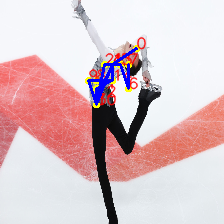

In [ ]:
BODY_PARTS = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
              "Background": 15}

POSE_PAIRS = [["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
              ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
              ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"]]

# setting network
protoFile='/content/drive/MyDrive/pose_deploy_linevec_faster_4_stages.prototxt'
weightsFile='/content/drive/MyDrive/pose_iter_160000.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

image = cv2.imread('/content/drive/MyDrive/사진25장/5.jpg')
image = cv2.resize(image, (224, 224))
imageHeight, imageWidth, imageColor = image.shape

#이미지 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output=net.forward()

H = output.shape[2]
W = output.shape[3]


# points 이미지에 입력
points = []
for i in range(0, 15):
    probMap = output[0, i, :, :]


    #(9.076588321477175e-05, 0.27673089504241943, (17, 11), (10, 12))
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    print(x,y)

    if prob > 0.001:
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1,
                   lineType=cv2.FILLED)  # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1,
                    lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else:
        points.append(None)

# 관절들 선으로 연결
for pair in POSE_PAIRS:
    partA = pair[0]  # Head
    partA = BODY_PARTS[partA]  # 0
    partB = pair[1]  # Neck
    partB = BODY_PARTS[partB]  # 1

    # print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(image, points[partA], points[partB], (255, 0, 0), 2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4, "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9, "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14

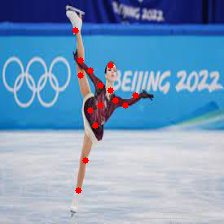

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/사진25장/1.jfif'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (110, 65), (110, 90), (100, 85), (90, 70), (80, 60),(115,100), (125, 105), (135,95),(90,110),(80,75),(75,30),(95,125),(85,160),(78,190),(100,105)
]

# 좌표에 점 표시
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)

# 이미지 출력
cv2_imshow(image)


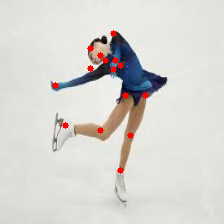

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/사진25장/2.jfif'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (90, 48),(100, 55),(105,60),(90,68),(55,85),(113,33),(115,60),(113,69),(125,95),(100,130),(65,125),(145,95),(130,135),(120,170),(120,65)
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)


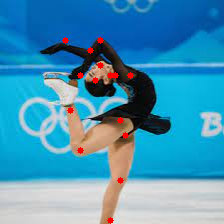

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/사진25장/3.jfif'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (95, 80),(110,75),(115,75),(100,40),(80,75),(100,65),(90,50),(65,40),(120,120),(80,150),(70,110),(125,135),(120,180),(110,220),(130,75)
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

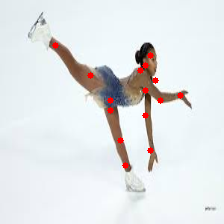

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/사진25장/4.jfif'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (150, 55),(145,65),(140,70),(160,100),(180,95),(155,80),(145,115),(150,150),(110,110),(90,75),(55,45),(110,100),(120,140),(125,165),(145,90)
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

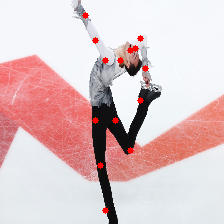

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/사진25장/5.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (130, 50),(120,60),(135,48),(140,38),(145,68),(105,60),(95,40),(85,15),(95,120),(115,120),(130,150),(140,100),(100,165),(105,210)
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

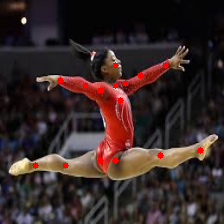

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올7.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (115, 65),#0머리
    (115, 85),#1목
    (100,90),#2오어깨
    (85,85),#3오팔꿈치
    (60,80),#4오손목
    (125,83),#5왼어깨
    (140,75),#6왼팔꿈치
    (165,65),#7왼손목
    (115,160),#8오엉덩
    (160,155),#9오무릎
    (200,150),#10오발목
    (100,160),#11왼엉덩
    (65,165),#12왼무릎
    (35,165),#13왼발목
    (120, 100)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

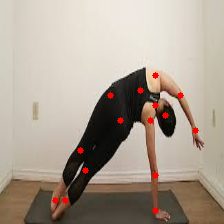

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올8.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (165, 115),#0머리
    (155, 105),#1목
    (150,120),#2오어깨
    (155,175),#3오팔꿈치
    (155,210),#4오손목
    (155,75),#5왼어깨
    (180,95),#6왼팔꿈치
    (195,130),#7왼손목
    (120,120),#8오엉덩
    (85,170),#9오무릎
    (65,200),#10오발목
    (110,95),#11왼엉덩
    (80,150),#12왼무릎
    (55,200),#13왼발목
    (140,90)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

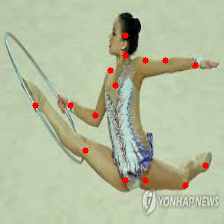

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올9.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (125, 35),#0머리
    (125, 55),#1목
    (110,70),#2오어깨
    (95,115),#3오팔꿈치
    (70,105),#4오손목
    (145,60),#5왼어깨
    (165,60),#6왼팔꿈치
    (195,65),#7왼손목
    (125,180),#8오엉덩
    (85,150),#9오무릎
    (35,105),#10오발목
    (145,180),#11왼엉덩
    (185,185),#12왼무릎
    (205,165),#13왼발목
    (115,85)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

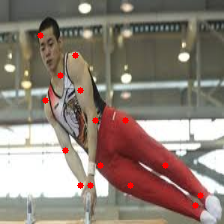

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올10.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (40, 35),#0머리
    (60, 75),#1목
    (45,100),#2오어깨
    (65,150),#3오팔꿈치
    (80,185),#4오손목
    (75,55),#5왼어깨
    (95,120),#6왼팔꿈치
    (90,185),#7왼손목
    (100,165),#8오엉덩
    (130,185),#9오무릎
    (195,205),#10오발목
    (125,120),#11왼엉덩
    (165,165),#12왼무릎
    (200,195),#13왼발목
    (80,90)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

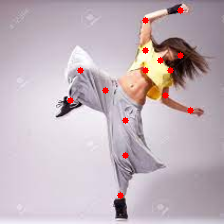

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올11.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (180, 55),#0머리
    (160, 60),#1목
    (145,50),#2오어깨
    (145,20),#3오팔꿈치
    (180,10),#4오손목
    (170,70),#5왼어깨
    (165,95),#6왼팔꿈치
    (190,110),#7왼손목
    (105,90),#8오엉덩
    (80,70),#9오무릎
    (70,100),#10오발목
    (125,120),#11왼엉덩
    (125,155),#12왼무릎
    (120,195),#13왼발목
    (145,70)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

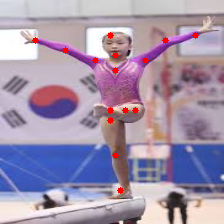

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올12.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (110, 35),#0머리
    (115, 55),#1목
    (95,60),#2오어깨
    (65,50),#3오팔꿈치
    (35,40),#4오손목
    (145,60),#5왼어깨
    (165,40),#6왼팔꿈치
    (195,35),#7왼손목
    (110,120),#8오엉덩
    (115,155),#9오무릎
    (120,190),#10오발목
    (135,110),#11왼엉덩
    (125,110),#12왼무릎
    (110,110),#13왼발목
    (115,70)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

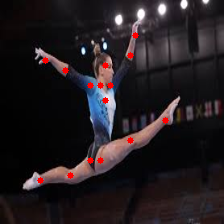

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올13.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (105, 65),#0머리
    (100, 85),#1목
    (90,85),#2오어깨
    (65,70),#3오팔꿈치
    (45,60),#4오손목
    (110,85),#5왼어깨
    (130,55),#6왼팔꿈치
    (135,35),#7왼손목
    (100,160),#8오엉덩
    (130,140),#9오무릎
    (165,120),#10오발목
    (90,160),#11왼엉덩
    (70,175),#12왼무릎
    (40,180),#13왼발목
    (105,100)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

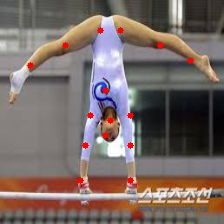

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올14.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (105, 135),#0머리
    (110, 120),#1목
    (130,115),#2오어깨
    (130,145),#3오팔꿈치
    (130,180),#4오손목
    (90,115),#5왼어깨
    (85,145),#6왼팔꿈치
    (80,180),#7왼손목
    (120,30),#8오엉덩
    (160,45),#9오무릎
    (190,60),#10오발목
    (100,30),#11왼엉덩
    (65,45),#12왼무릎
    (30,65),#13왼발목
    (105,90)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

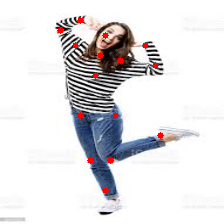

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올15.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (105, 35),#0머리
    (100, 55),#1목
    (75,45),#2오어깨
    (60,30),#3오팔꿈치
    (80,20),#4오손목
    (120,60),#5왼어깨
    (155,65),#6왼팔꿈치
    (145,45),#7왼손목
    (80,115),#8오엉덩
    (90,160),#9오무릎
    (105,190),#10오발목
    (115,115),#11왼엉덩
    (110,160),#12왼무릎
    (160,135),#13왼발목
    (95,75)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

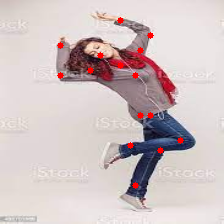

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올16.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (100, 55),#0머리
    (120, 65),#1목
    (90,70),#2오어깨
    (60,75),#3오팔꿈치
    (60,45),#4오손목
    (140,50),#5왼어깨
    (150,35),#6왼팔꿈치
    (120,20),#7왼손목
    (150,115),#8오엉덩
    (180,140),#9오무릎
    (130,145),#10오발목
    (140,115),#11왼엉덩
    (160,150),#12왼무릎
    (135,185),#13왼발목
    (135,75)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

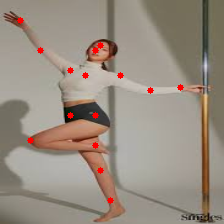

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올17.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (100, 45),#0머리
    (95, 50),#1목
    (70,70),#2오어깨
    (40,50),#3오팔꿈치
    (20,20),#4오손목
    (120,75),#5왼어깨
    (150,90),#6왼팔꿈치
    (180,87),#7왼손목
    (70,115),#8오엉덩
    (100,170),#9오무릎
    (110,200),#10오발목
    (95,115),#11왼엉덩
    (30,140),#12왼무릎
    (95,145),#13왼발목
    (85,75)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

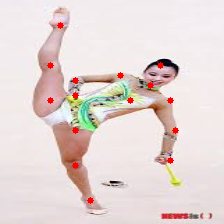

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올18.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (160, 65),#0머리
    (150, 85),#1목
    (120,75),#2오어깨
    (75,80),#3오팔꿈치
    (75,95),#4오손목
    (170,100),#5왼어깨
    (175,130),#6왼팔꿈치
    (170,160),#7왼손목
    (50,100),#8오엉덩
    (50,65),#9오무릎
    (60,25),#10오발목
    (75,130),#11왼엉덩
    (75,165),#12왼무릎
    (90,200),#13왼발목
    (130,100)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

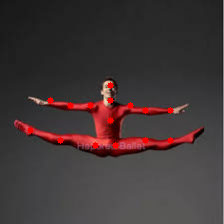

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올19.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
     (110, 85),#0머리
    (110, 100),#1목
    (90,105),#2오어깨
    (70,105),#3오팔꿈치
    (50,100),#4오손목
    (130,105),#5왼어깨
    (145,110),#6왼팔꿈치
    (170,110),#7왼손목
    (95,145),#8오엉덩
    (60,140),#9오무릎
    (30,130),#10오발목
    (115,145),#11왼엉덩
    (145,140),#12왼무릎
    (170,140),#13왼발목
    (110,120)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

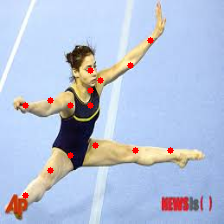

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올20.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (90, 70),#0머리
    (90, 90),#1목
    (70,105),#2오어깨
    (50,100),#3오팔꿈치
    (25,105),#4오손목
    (100,80),#5왼어깨
    (130,65),#6왼팔꿈치
    (150,40),#7왼손목
    (70,155),#8오엉덩
    (50,170),#9오무릎
    (25,195),#10오발목
    (95,145),#11왼엉덩
    (135,150),#12왼무릎
    (170,150),#13왼발목
    (90,105)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

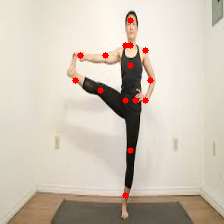

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올23.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (130, 20),#0머리
    (130, 45),#1목
    (125,45),#2오어깨
    (105,55),#3오팔꿈치
    (80,55),#4오손목
    (145,50),#5왼어깨
    (150,80),#6왼팔꿈치
    (145,100),#7왼손목
    (125,100),#8오엉덩
    (100,90),#9오무릎
    (75,80),#10오발목
    (135,100),#11왼엉덩
    (130,150),#12왼무릎
    (125,195),#13왼발목
    (130,65)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

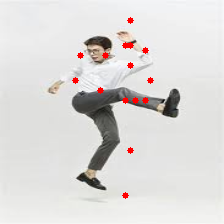

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올24.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (130, 20),#0머리
    (130, 45),#1목
    (125,45),#2오어깨
    (105,55),#3오팔꿈치
    (80,55),#4오손목
    (145,50),#5왼어깨
    (150,80),#6왼팔꿈치
    (145,100),#7왼손목
    (125,100),#8오엉덩
    (100,90),#9오무릎
    (75,80),#10오발목
    (135,100),#11왼엉덩
    (130,150),#12왼무릎
    (125,195),#13왼발목
    (130,65)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)

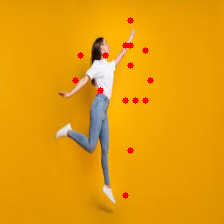

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path = '/content/drive/MyDrive/다리올/다리올25.jpg'

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))

# (Head(0),Neck(1),RShoulder(2),RElbow(3),RWrist(4),LShoulder(5),LELbow(6),LWrist(7),RHip(8),RKnee(9),RAnkle(10),LHip(11),LKnee(12),LAnkle(13),Chest(14))
points = [
    (130, 20),#0머리
    (130, 45),#1목
    (125,45),#2오어깨
    (105,55),#3오팔꿈치
    (80,55),#4오손목
    (145,50),#5왼어깨
    (150,80),#6왼팔꿈치
    (145,100),#7왼손목
    (125,100),#8오엉덩
    (100,90),#9오무릎
    (75,80),#10오발목
    (135,100),#11왼엉덩
    (130,150),#12왼무릎
    (125,195),#13왼발목
    (130,65)#14가슴
]
for point in points:
    cv2.circle(image, point, 3, (0, 0, 255), thickness=-1)
cv2_imshow(image)